# IBM Capstone Project 

# Segmenting and clustering Neighborhoods in Toronto, Canada

# Part I

## **Data understanding**

This is a list of postal codes in Canada where the first letter is M. Postal codes beginning with M are located within the city of Toronto in the province of Ontario. Only the first three characters are listed, corresponding to the Forward Sortation Area.

*Note:* There are no rural FSAs in Toronto, hence no postal codes should start with M0, however, the postal code M0R 8T0 is assigned to an Amazon warehouse in Mississauga, suggesting that Canada Post may be allocating the M0 FSA for high volume addresses.(from Wikipedia) 

### Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner 
import pandas as pd # library for data analysis 
from bs4 import BeautifulSoup # library to pull data out of HTML and XML files
from geopy.geocoders import Nominatim # to convert an address into latitude and longitude values
import requests # library to handle requests
# matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize # transform json file into dataframe 
# import k-means for clustering stage
from sklearn.cluster import KMeans 
!pip install folium # installing folium library 
import folium # map rendering library 
print('Libraries imported') 

Libraries imported


!conda install -c conda-forge folium=0.5.0 --yes

### Retrieve data from Wikipedia 

In [2]:
url='https://en.m.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
wiki= requests. get(url).text
soup=BeautifulSoup(wiki, 'html.parser') 
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Xo3XjApAEJkAAkBHB-cAAACY","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":949497198,"wgRevisionId":949497198,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPageName":"List_of_postal_codes_of_Canada:_M","wgRelevantArticleId

## Data cleaning 

### Turn data into a pandas dataframe 

In [3]:
data=[]
for tr in soup.tbody.find_all('tr'): 
    data.append([td.get_text().strip() for td in tr.find_all('td') ]) 
df=pd.DataFrame(data,columns=['PostalCode', 'Borough', 'Neighborhood ']) 
df.head() 
                

,PostalCode,Borough,Neighborhood
0,None,None,None
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


### Clean the Borough column

In [4]:
# drop the columns 'Borough' with 'Not assigned' like value
df=df[df.Borough!='Not assigned'].reset_index().drop('index', axis=1) 
# Drop the first row
df.dropna(inplace=True) 

### Collapse data

In [5]:
# let's combine the Neighborhoods which have same PostalCode and Borough in the same column 
df=df.groupby(['PostalCode', 'Borough'])['Neighborhood '].apply(','.join).reset_index()
df

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


### Clean the Neighborhood column 

In [6]:
# attribute the corresponding Borough to the Neighborhood that has Not assigned like value
df.loc[df['Neighborhood ']=='Not assigned','Neighborhood ']=df['Borough']
df

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


## Data exploration 



In [7]:
# number of row in the data 
print ('There are {} row in the data'.format(df.shape[0])) 

There are 103 row in the data


# Part II 

## Load and read the data

Let's import the data of all coordinates (Latitude and Longitude) of each Neighborhood 

In [8]:
coord=pd.read_csv('http://cocl.us/Geospatial_data') 
coord

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


## Data merging 

Let's merge the data coordinate with the data in the part I, before that let's rename the first column 'Postale Code' 

In [9]:
# rename the first column of the data
coord.rename(columns={'Postal Code':'PostalCode'}, inplace=True) 
# merge the data
df_toronto=pd.merge(df,coord, on='PostalCode') 
df_toronto 

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


## Part III 

## Segmenting Toronto neighborhood 

### Get the coordinates of Toronto

In [10]:
address='Toronto, ON' 
geolocator=Nominatim(user_agent='toronto_explorer') 
location=geolocator.geocode(address) 
latitude=location.latitude 
longitude=location.longitude 
print('The geographical coordinates of Toronto are: Latitude={}, Longitude={}'.format(latitude,longitude)) 

The geographical coordinates of Toronto are: Latitude=43.6534817, Longitude=-79.3839347


### Create a map of Toronto with neighborhood superimposed on top 

In [11]:
# map of Toronto 
map_toronto=folium.Map(location=[latitude,longitude ], zoom_start=14)
# add markers
for lat, long, borough, neighborhood in zip (df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood ']): 
    label='{},{}'.format(neighborhood,borough) 
    label=folium.Popup(label, parse_html=False) 
    folium.CircleMarker(
        [lat, long], 
        radius=5,
        popup=label, 
        color='blue', 
        fill=True, 
        fill_color='#e182f2',
        fill_opacity=0.7,
        parse_html=True).add_to(map_toronto) 
# show map with Borough and Neighborhood 
map_toronto

### Define Foursquare credentials and version

In [12]:
#Foursquare CREDENTIALS
CLIENT_ID = 'QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ' # your Foursquare ID
CLIENT_SECRET = 'CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM' # your Foursquare Secret
VERSION = '20180604'
print ('YOUR CREDENTIALS: ') 
print ('CLIENT_ID: ' + CLIENT_ID) 
print('CLIENT_SECRET: ' + CLIENT_SECRET) 

YOUR CREDENTIALS: 
CLIENT_ID: QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ
CLIENT_SECRET: CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM


In [ ]:
!pip install -U python-dotenv 

In [ ]:

# for more information about Foursquare API credentials please read README.md file
# get credentials from .env file
from dotenv import load_dotenv
import os

load_dotenv()
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')
VERSION = os.getenv('VERSION')

### Exploration of the first neighborhood 

In [13]:
# name 
neighborhood_name=df_toronto.loc[0, 'Neighborhood ']
# latitude and longitude 
neighborhood_lat=df_toronto.loc[0, 'Latitude']
neighborhood_lon=df_toronto.loc[0, 'Longitude']
print ('The first neighborhood is {} with {} latitude and {} longitude'.format(neighborhood_name, neighborhood_lat, neighborhood_lon)) 

The first neighborhood is Malvern / Rouge with 43.806686299999996 latitude and -79.19435340000001 longitude


### Now let's get the top 100 venues that are in  Malvern / Rouge within a radius of 500 meters 

In [14]:
# limit 
LIMIT=100
# radius
radius= 500
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_lon,   
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ&client_secret=CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM&v=20180604&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [15]:
# get the url
results=requests.get(url).json
results 

<bound method Response.json of <Response [200]>>

In [16]:
# build the function that extract the category of venue
def get_category_type(row): 
    try: 
        category_list=row['categories']
    except: 
        category_list=row['venue.categories']
    if len (category_list==0): 
        return None 
    else: 
        return (category_list[0]['name']) 


In [ ]:
venues=results['response']['groups'][0]['items']
# transform data into pandas dataframe 
nearby_venues=json_normalize(venues) 
# create a column for the dataframe 
filtered_columns=['venue.name','venue.categories','venue.location.lat', 'venue.location.lng']
# attribute the column to the dataframe 
nearby_venues=nearby_venues.loc[:,filtered_columns]
# filter the category for each row
nearby_venues['venue.categories']=nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns=[col.split('.')[-1] for col in nearby_venues.columns]
nearby_venues
                                    

How many venue where returned by Foursquare? 

In [ ]:
print('There are {} venues returned by Foursquare'.format(nearby_venues.shape[0])) 

## Exploration of each neighborhood in Toronto 

### Function to explore each neighborhood 

Let's build a function to repeat the same process to all neighborhood 

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Apply the function to the dataframe 

In [18]:
# Generating venues for each neighborhood 
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood '],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude'])

Malvern / Rouge
Rouge Hill / Port Union / Highland Creek
Guildwood / Morningside / West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park / Ionview / East Birchmount Park
Golden Mile / Clairlea / Oakridge
Cliffside / Cliffcrest / Scarborough Village West
Birch Cliff / Cliffside West
Dorset Park / Wexford Heights / Scarborough Town Centre
Wexford / Maryvale
Agincourt
Clarks Corners / Tam O'Shanter / Sullivan
Milliken / Agincourt North / Steeles East / L'Amoreaux East
Steeles West / L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview / Henry Farm / Oriole
Bayview Village
York Mills / Silver Hills
Willowdale / Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor / Wilson Heights / Downsview North
Northwood Park / York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill / Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West / Riverdale
India Bazaar / The Beaches 

### Check the number of venues

In [19]:
# numbers of venues
print('There are {} venues in the dataset'.format(toronto_venues.shape[0])) 

There are 2173 venues in the dataset


### Check the number of venues for each neighborhood 

In [46]:
toronto_venues.groupby('Neighborhood').count() 

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Count
Neighborhood,,,,,,,
Agincourt,4,4,4,4,4,4,0
Alderwood / Long Branch,11,11,11,11,11,11,0
Bathurst Manor / Wilson Heights / Downsview North,20,20,20,20,20,20,0
Bayview Village,4,4,4,4,4,4,0
Bedford Park / Lawrence Manor East,23,23,23,23,23,23,0
Berczy Park,56,56,56,56,56,56,0
Birch Cliff / Cliffside West,4,4,4,4,4,4,0
Brockton / Parkdale Village / Exhibition Place,22,22,22,22,22,22,0
Business reply mail Processing CentrE,17,17,17,17,17,17,0


Let's plot the neighborhoods with 100 venues

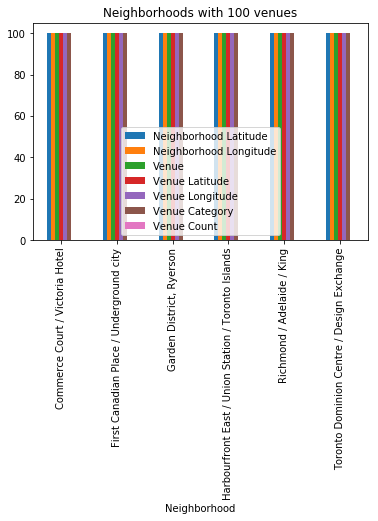

In [76]:
df_total_venues=toronto_venues.groupby('Neighborhood').count() 
df_total_venues[df_total_venues['Venue']==100].plot(kind='bar', title='Neighborhoods with 100 venues') 

### Create dummy variable based on Venue Category for each row

In [77]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood']=toronto_venues['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
# check the number of rows. It must be equal to that of toronto_venues
print("The dataset has {} rows.".format(toronto_onehot.shape[0]))
# print data
toronto_onehot.head()

The dataset has 2173 rows.


,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Malvern / Rouge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Malvern / Rouge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rouge Hill / Port Union / Highland Creek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Guildwood / Morningside / West Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Guildwood / Morningside / West Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Group row by neighborhood 

In [78]:
toronto_grouped=toronto_onehot.groupby('Neighbourhood').mean().reset_index()
# Check the shape of toronto_grouped.
print("The shape of the dataframe is {}".format(toronto_grouped.shape))  
# Print the data
toronto_grouped.head()

The shape of the dataframe is (95, 268)


,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Alderwood / Long Branch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Bathurst Manor / Wilson Heights / Downsview North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,Bedford Park / Lawrence Manor East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


### Let's examine the size of the new dataframe 

In [79]:
toronto_grouped.shape

(95, 268)

### Let's print each neighborhood along with the top 5 most common venues

In [80]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float) 
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0               Skating Rink  0.25
1                     Lounge  0.25
2             Breakfast Spot  0.25
3  Latin American Restaurant  0.25
4         Mexican Restaurant  0.00


----Alderwood / Long Branch----
            venue  freq
0     Pizza Place  0.18
1    Dance Studio  0.09
2        Pharmacy  0.09
3             Gym  0.09
4  Sandwich Place  0.09


----Bathurst Manor / Wilson Heights / Downsview North----
                       venue  freq
0                       Bank  0.10
1                Coffee Shop  0.10
2                Bridal Shop  0.05
3  Middle Eastern Restaurant  0.05
4        Fried Chicken Joint  0.05


----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Bank  0.25
2  Japanese Restaurant  0.25
3                 Café  0.25
4    Accessories Store  0.00


----Bedford Park / Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.09
1      Sandwich Place  

### Let's put that into a pandas dataframe¶

First, let's write a function to sort the venues in descending order.


In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

## Clustering 

In [84]:
# set the number of cluster
kclusters=5
# set the data
toronto_grouped_clustering=toronto_grouped.drop('Neighbourhood', 1)
# run K-means clustering 
kmeans=KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering) 
# k-means labels
labels=kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 2,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 1, 1], dtype=int32)

In [85]:
toronto_grouped 

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,Alderwood / Long Branch,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,Bathurst Manor / Wilson Heights / Downsview North,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,Bayview Village,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,Bedford Park / Lawrence Manor East,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,Berczy Park,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,Birch Cliff / Cliffside West,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,Brockton / Parkdale Village / Exhibition Place,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,Business reply mail Processing CentrE,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.058824
9,CN Tower / King and Spadina / Railway Lands / ...,0.00000,0.000000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [86]:
df_toronto.rename(columns={'Neighborhood ': 'Neighbourhood'}) 

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


### Add cluster labels to toronto_grouped and then join back to df_toronto 

In [ ]:
# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

Finally let's visualize the resulting clustering 

In [ ]:
# create map
map_clusters = folium.Map(location=[43.706204, -79.398752], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'],toronto_merged['Longitude'],toronto_merged['Neighborhood'],toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

###  Examine Clusters

### Cluster 1


In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]

### Cluster 2


In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]

### Cluster 3


In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]

### Cluster 4


In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]

### Cluster 5

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]